In [ ]:
# Used citypy to identify 500 random city names with information on Coordinates.
# Used the randomely selected citites and utilized openweather API to generate current weather data - Temp, Humidity, Wind speed and cloudiness
# Published 4 charts using matplotlibs

# OBSERVATION 1: Refer In [112] - Cities closer to the poles experience lower temparatures
# OBSERVATION 2: Refer In [114] - Cities closer to the Equator have higher Humidity
# OBSERVATION 3: Refer In [117] - Wind speeds are higher closer to the poles

In [1]:
import csv
import json
import pandas as pd
import numpy as np
from random import sample
import matplotlib.pyplot as plt
import requests as req

In [2]:
api_key = "25bc90a1196e6f153eece0bc0b0fc9eb"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

In [3]:
query_url = url + "appid=" + api_key + "&units=" + units + "&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q='

In [4]:
weather_data = []
cities = ["calenzano", "broadford", "akalkot", "teyateyaneng", "haripur", "tutrakan", "marly", "correia pinto", "sal rei", "mikulcice", "primero de enero", "velke mezirici", "calolziocorte", "dingli", "axapusco", "reconquista", "quata", "conceicao da barra", "mantsala", "minakuchi", "boom", "turuvekere", "boca del rio", "homburg", "la baule-escoublac", "viladecans", "wiener neustadt", "tranbjerg", "tahara", "korbach", "vadamadurai", "limbourg", "bathgate", "liure", "kampong chhnang", "malling", "moravska nova ves", "krestena", "sarrebourg", "bushehr", "berlare", "rawannawi", "balurghat", "kamalapuram", "hagen", "pameungpeuk", "morecambe", "chakan", "labe", "malaga", "langenzenn", "pizarro" , "bondues", "vertesszolos", "booue", "severiano melo", "sanchor", "itapora", "rajura", "khetri", "cunen", "doiwala", "ruiz", "tipuani", "pedra azul", "sitionuevo", "chhaprauli", "kobyli", "jamkhed", "presidente bernardes", "nicosia", "huitziltepec", "alnavar", "sivagiri", "alli meria", "perg", "ivoti", "agua blanca sur", "ilmatsalu", "temixco", "conil", "ihosy", "kreuztal", "korycany", "ihtiman", "dehu", "choachi", "devarkonda", "murnau", "udagamandalam", "jalandhar", "kefamenanu", "date", "zhetysay", "aosta", "yamaranguila", "lumajang", "cologne", "dillenburg", "paranapanema", "dongning", "ergolding", "belapatfalva", "vocklamarkt", "ciampea", "fatehabad", "rizoma", "solbjerg", "fomento", "aracoiaba", "kamenice", "norre aaby", "san jose de rio tinto", "spata", "garango", "dubreka", "montalto uffugo", "guaymitas", "sceaux", "sanquhar", "duque de caxias", "maldegem", "ryugasaki", "darnetal", "ayautla", "porrentruy", "tirthahalli", "port-louis", "santa ana huista", "gubbio", "tucurui", "joconal", "manali", "helensburgh", "nauplion", "payyannur", "nideggen", "guapota", "shangzhi", "barentu", "kiili", "samaniego", "regente feijo", "examilia", "pembroke", "dafeng", "voru", "chuncheng", "wonji", "bettange-sur-mess", "masunga", "sucre", "pachora", "szentlorinckata", "gumla", "tonder", "batamshinskiy", "ganzhou", "navapur", "saint-raphael", "creemore", "qasigiannguit", "nagyrabe", "limburgerhof", "greenock", "ami", "guane", "kunovice", "guder", "ziezmariai", "petra", "kulashi", "siauliai", "niksic", "la esperanza", "zaritap", "boyolangu", "vrbno pod pradedem", "san pietro vernotico", "iwade", "lagoa da prata", "komaki", "yunhe", "marratxi", "penalva", "rath", "morroa", "villa nueva", "moulins", "stara zagora", "sirsaganj", "diyarb najm", "litein", "affoltern", "cabanas", "mannheim", "alban", "kukshi", "formia", "monte alegre de sergipe", "naivasha", "meseista", "laytown", "hamilton", "sakti", "cuddapah", "marmora", "civitavecchia", "verin", "borgomanero", "paraibano", "campos do jordao", "ormilia", "greve strand", "kawardha", "dois riachos", "riemst", "qianjiang", "briceni", "palmerston", "charters towers", "grand-couronne", "punta arenas", "lebeny", "tetzoyocan", "eching", "fugen", "gosport", "gayeri", "bad hersfeld", "karari", "konigstein", "pombia", "buri", "narsingdi", "potosi", "chene-bourg", "fenwick", "garhshankar", "toyota", "fenyi", "hillerod", "espelkamp", "hered", "osijek", "asmar", "kanda", "mandok", "montrose", "apolda", "shizilu", "utashinai", "thasos", "zlatarica", "racale", "grand sable", "santiago chimaltenango", "doctor mora", "gadarwara", "melegnano", "menton", "mage", "pozorice", "ersekvadkert", "cuyutlan", "rostaq", "siaya", "itapira", "palmares", "marathokambos", "gouyave", "fairlie", "lempaala", "san sebastian", "wanze", "abastumani", "neckarsulm", "banjar", "santa helena de goias", "amanganj", "ahtopol", "asvestokhorion", "ronchi dei legionari", "maceio", "isla del bosque", "potamia", "jaszapati", "ascoli piceno", "dholka", "nachod", "la llagosta", "jaguaquara", "bouna", "amaraji", "penol", "szarvas", "dettingen", "cancuc", "don benito", "san alberto", "vigia del fuerte", "gzira", "arivonimamo", "hofgeismar", "wonthaggi", "lakheri", "tomigusuku", "ibia", "acireale", "mahabaleshwar", "siofok", "donja medjidja", "cotui", "antanifotsy", "karditsomagoula", "tsaghkahovit", "novellara", "la florida", "pecky", "ushiku", "la ermita", "daosa", "poliyiros", "dhaulpur", "samaghar", "udaipura", "munchberg", "kirknewton", "sarande", "ayia paraskevi", "wipperfurth", "linkuva", "itaunja", "louviers", "mantes-la-ville", "ghedi", "stalis", "mengcheng", "saint john", "horb", "cha grande", "hulan", "jerez", "taixing", "jabbeke", "lich", "sousa", "villa altagracia", "wakkanai", "podares", "rathangan", "lishan", "louth", "noyon", "ashta", "maripi", "douglas", "morinville", "los zacatones", "inhambupe", "pescara", "premnitz", "coloso", "virudunagar", "katouna", "birr", "kochi", "aba", "wrexham", "ibaiti", "beni", "bludov", "rengali", "pesqueria", "furstenfeld", "junagadh", "vitorino freire",       "bom jesus da lapa", "blankenburg", "chapleau", "oistins", "banyumas", "sandweiler", "rocca priora", "tuzla", "kill", "gland", "karatau", "torma", "temascalcingo", "tausa", "karkaralinsk", "veverska bityska", "chaumont", "newtown saint boswells", "hondo", "murici", "tabatinga", "penukonda", "hukvaldy", "grammatikou", "gardabani", "temaraia", "toledo", "merchtem", "quaregnon", "brcko", "danshui", "santa comba", "sukabumi", "khem karan", "jiaojiang", "ohrid", "tootsi", "kilkenny", "el naranjo", "raymond terrace", "yamasaki", "coyula", "vols", "cuauhtemoc", "cruzeiro do sul", "albano laziale", "point pedro", "rabat", "uwajima", "villerupt", "uhingen", "barry", "libourne", "nemesnadudvar", "correntina", "pennadam", "entrerrios", "tabukiniberu", "santa maria del real", "romanshorn", "palmonostora", "imatra", "gaoual", "meckenheim", "los angeles", "risti", "palaiokhorion", "kocser", "madrid", "kolhapur", "slusovice", "zelino", "berga", "ferme-neuve", "la uvita", "ayiasos", "tila", "villafranca di verona", "kokkola", "teslic", "vinni", "bhasawar", "hillaby", "losone", "impruneta", "qianan", "bibai", "viking", "akalgarh", "pontoise", "grajau", "shipley", "pailitas", "haapsalu", "rajapur", "skalanion", "petropavl", "kirchlinteln", "aiyira", "arraias", "sarangarh", "allahganj", "turku", "meschede", "zeulenroda", "tomino", "linqiong", "kruishoutem", "kislang", "sparta", "cerrik", "cumbitara", "melilla", "waddan", "hunucma", "alangayam", "oyugis", "rinteln", "pedro carbo", "turaiyur", "pingdingshan", "aygepat"]

for city in cities:
    weather_data.append(req.get(query_url + city).json())
    
weather_data[0]

{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': 43.87, 'lon': 11.17},
 'dt': 1515343800,
 'id': 6541087,
 'main': {'humidity': 100,
  'pressure': 1018,
  'temp': 10.94,
  'temp_max': 13,
  'temp_min': 8},
 'name': 'Calenzano',
 'sys': {'country': 'IT',
  'id': 5861,
  'message': 0.0045,
  'sunrise': 1515307747,
  'sunset': 1515340492,
  'type': 1},
 'visibility': 7000,
 'weather': [{'description': 'broken clouds',
   'icon': '04n',
   'id': 803,
   'main': 'Clouds'}],
 'wind': {'speed': 0.5}}

In [5]:
print(weather_data)

[{'coord': {'lon': 11.17, 'lat': 43.87}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 10.94, 'pressure': 1018, 'humidity': 100, 'temp_min': 8, 'temp_max': 13}, 'visibility': 7000, 'wind': {'speed': 0.5}, 'clouds': {'all': 68}, 'dt': 1515343800, 'sys': {'type': 1, 'id': 5861, 'message': 0.0045, 'country': 'IT', 'sunrise': 1515307747, 'sunset': 1515340492}, 'id': 6541087, 'name': 'Calenzano', 'cod': 200}, {'coord': {'lon': -8.97, 'lat': 52.35}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 2.54, 'pressure': 1027, 'humidity': 90, 'temp_min': 2, 'temp_max': 3}, 'visibility': 10000, 'wind': {'speed': 2.1, 'deg': 10}, 'clouds': {'all': 0}, 'dt': 1515342600, 'sys': {'type': 1, 'id': 5240, 'message': 0.0033, 'country': 'IE', 'sunrise': 1515314620, 'sunset': 1515343293}, 'id': 2962283, 'name': 'Broadford', 'cod': 200}, {'coord': {'lon': 

In [23]:
weather_df = pd.DataFrame(weather_data)
weather_df.head()

,base,clouds,cod,coord,dt,id,main,message,name,rain,sys,visibility,weather,wind
0,stations,{'all': 68},200,"{'lon': 11.17, 'lat': 43.87}",1.515344e+09,6541087.0,"{'temp': 10.94, 'pressure': 1018, 'humidity': ...",NaN,Calenzano,NaN,"{'type': 1, 'id': 5861, 'message': 0.0045, 'co...",7000.0,"[{'id': 803, 'main': 'Clouds', 'description': ...",{'speed': 0.5}
1,stations,{'all': 0},200,"{'lon': -8.97, 'lat': 52.35}",1.515343e+09,2962283.0,"{'temp': 2.54, 'pressure': 1027, 'humidity': 9...",NaN,Broadford,NaN,"{'type': 1, 'id': 5240, 'message': 0.0033, 'co...",10000.0,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 2.1, 'deg': 10}"
2,stations,{'all': 0},200,"{'lon': 76.22, 'lat': 17.53}",1.515346e+09,1279147.0,"{'temp': 15.53, 'pressure': 972.66, 'humidity'...",NaN,Akalkot,NaN,"{'message': 0.0033, 'country': 'IN', 'sunrise'...",NaN,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 2.06, 'deg': 289.001}"
3,stations,{'all': 44},200,"{'lon': 27.74, 'lat': -29.15}",1.515346e+09,932035.0,"{'temp': 22.03, 'pressure': 830.96, 'humidity'...",NaN,Teyateyaneng,NaN,"{'message': 0.004, 'country': 'LS', 'sunrise':...",NaN,"[{'id': 802, 'main': 'Clouds', 'description': ...","{'speed': 2.21, 'deg': 225.001}"
4,stations,{'all': 0},200,"{'lon': 72.93, 'lat': 33.99}",1.515342e+09,1177107.0,"{'temp': 20, 'pressure': 1016, 'humidity': 68,...",NaN,Haripur,NaN,"{'type': 1, 'id': 7146, 'message': 0.0032, 'co...",4000.0,"[{'id': 711, 'main': 'Smoke', 'description': '...","{'speed': 1.06, 'deg': 40.5007}"


In [38]:
new_weather_df = weather_df[['name','coord', 'main', 'clouds', 'wind']].copy()
new_weather_df.head()

,name,coord,main,clouds,wind
0,Calenzano,"{'lon': 11.17, 'lat': 43.87}","{'temp': 10.94, 'pressure': 1018, 'humidity': ...",{'all': 68},{'speed': 0.5}
1,Broadford,"{'lon': -8.97, 'lat': 52.35}","{'temp': 2.54, 'pressure': 1027, 'humidity': 9...",{'all': 0},"{'speed': 2.1, 'deg': 10}"
2,Akalkot,"{'lon': 76.22, 'lat': 17.53}","{'temp': 15.53, 'pressure': 972.66, 'humidity'...",{'all': 0},"{'speed': 2.06, 'deg': 289.001}"
3,Teyateyaneng,"{'lon': 27.74, 'lat': -29.15}","{'temp': 22.03, 'pressure': 830.96, 'humidity'...",{'all': 44},"{'speed': 2.21, 'deg': 225.001}"
4,Haripur,"{'lon': 72.93, 'lat': 33.99}","{'temp': 20, 'pressure': 1016, 'humidity': 68,...",{'all': 0},"{'speed': 1.06, 'deg': 40.5007}"


In [60]:
new_weather_df.to_csv('out_2.csv', sep=',')

In [61]:
summary_df = "data_3.csv"
summary_df = pd.read_csv(summary_df)
summary_df.head()

,#,name,Lon,Lat,Temp,Pressure,Humidity,Min Temp,Max_Temp,Clouds,Speed,B,C
0,1,Broadford,-8.97,52.35,2.54,1027.0,90.0,2.0,3.0,0.0,2.10,'deg': 10,NaN
1,4,Haripur,72.93,33.99,20.00,1016.0,68.0,20.0,20.0,0.0,1.06,'deg': 40.5007,NaN
2,5,Tutrakan,26.62,44.05,9.00,1025.0,81.0,9.0,9.0,0.0,2.10,'deg': 270,NaN
3,13,Dingli,14.38,35.86,16.00,1017.0,93.0,16.0,16.0,0.0,8.70,'deg': 150,NaN
4,22,Boca del Rio,-76.21,-13.68,24.00,1014.0,69.0,24.0,24.0,0.0,3.60,'deg': 320,NaN


In [106]:
new_summary_df = summary_df[['name','Lon', 'Lat', 'Temp', 'Pressure', 'Humidity', 'Min Temp', 'Max_Temp', 'Clouds', 'Speed']].copy()
new_summary_df.head()

,name,Lon,Lat,Temp,Pressure,Humidity,Min Temp,Max_Temp,Clouds,Speed
0,Broadford,-8.97,52.35,2.54,1027.0,90.0,2.0,3.0,0.0,2.10
1,Haripur,72.93,33.99,20.00,1016.0,68.0,20.0,20.0,0.0,1.06
2,Tutrakan,26.62,44.05,9.00,1025.0,81.0,9.0,9.0,0.0,2.10
3,Dingli,14.38,35.86,16.00,1017.0,93.0,16.0,16.0,0.0,8.70
4,Boca del Rio,-76.21,-13.68,24.00,1014.0,69.0,24.0,24.0,0.0,3.60


In [111]:
#1 scatter plot  Temperature (F) vs. Latitude

summary_df.plot(kind="scatter", x="Temp", y="Lat", grid=True, figsize=(20,10), 
                title="Temp Vs. Lat")

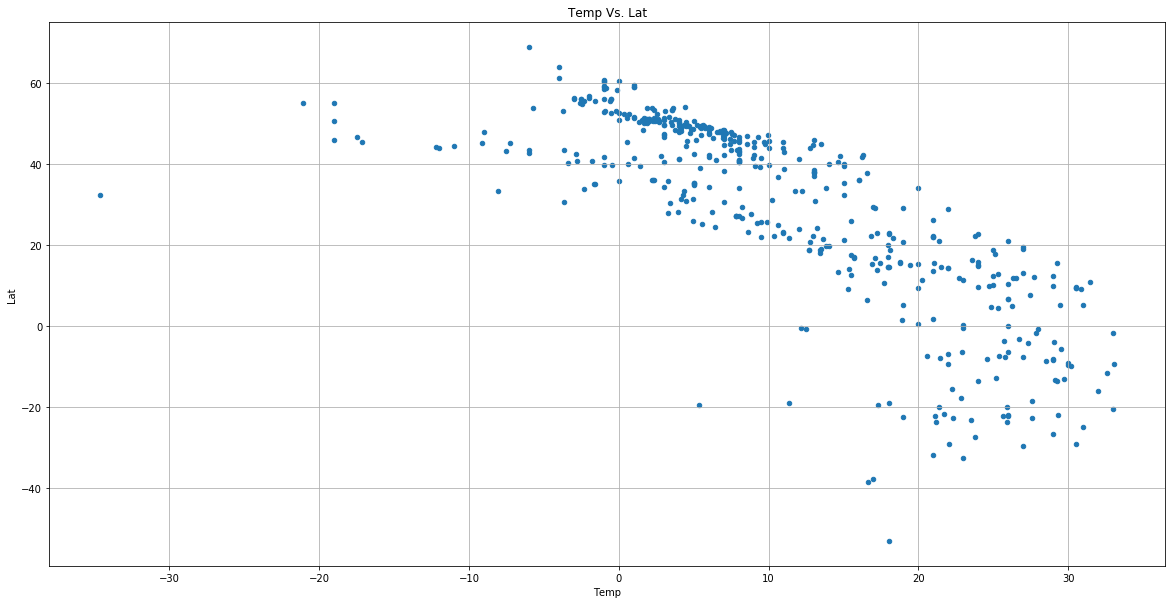

In [112]:
plt.show()

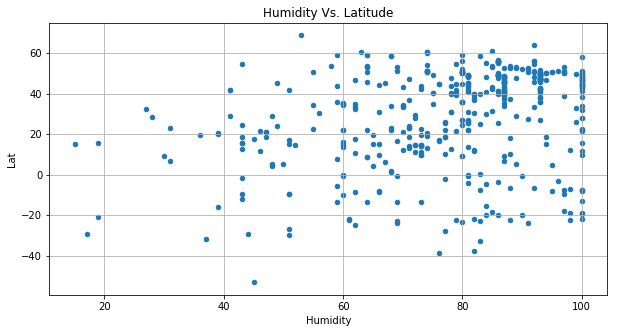

In [114]:
#2 scatter plot  Humidity (%) vs. Latitude

summary_df.plot(kind="scatter", x="Humidity", y="Lat", grid=True, figsize=(10,5), 
                title="Humidity Vs. Latitude")

plt.show()

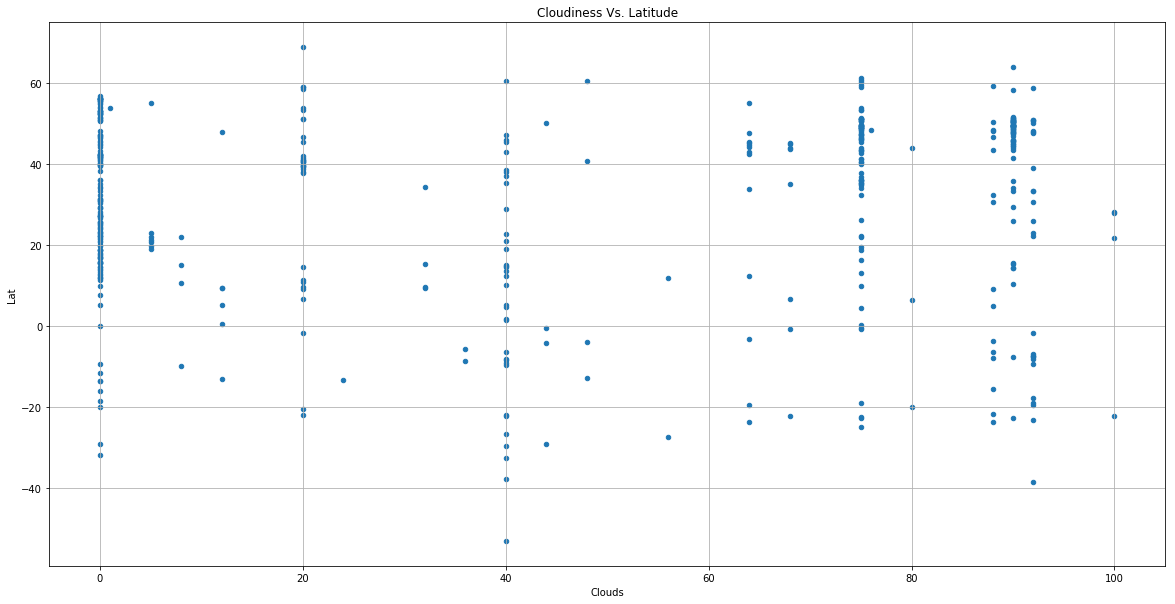

In [97]:
#3 scatter plot Cloudiness (%) vs. Latitude

summary_df.plot(kind="scatter", x="Clouds", y="Lat", grid=True, figsize=(20,10), 
                title="Cloudiness Vs. Latitude")

plt.show()

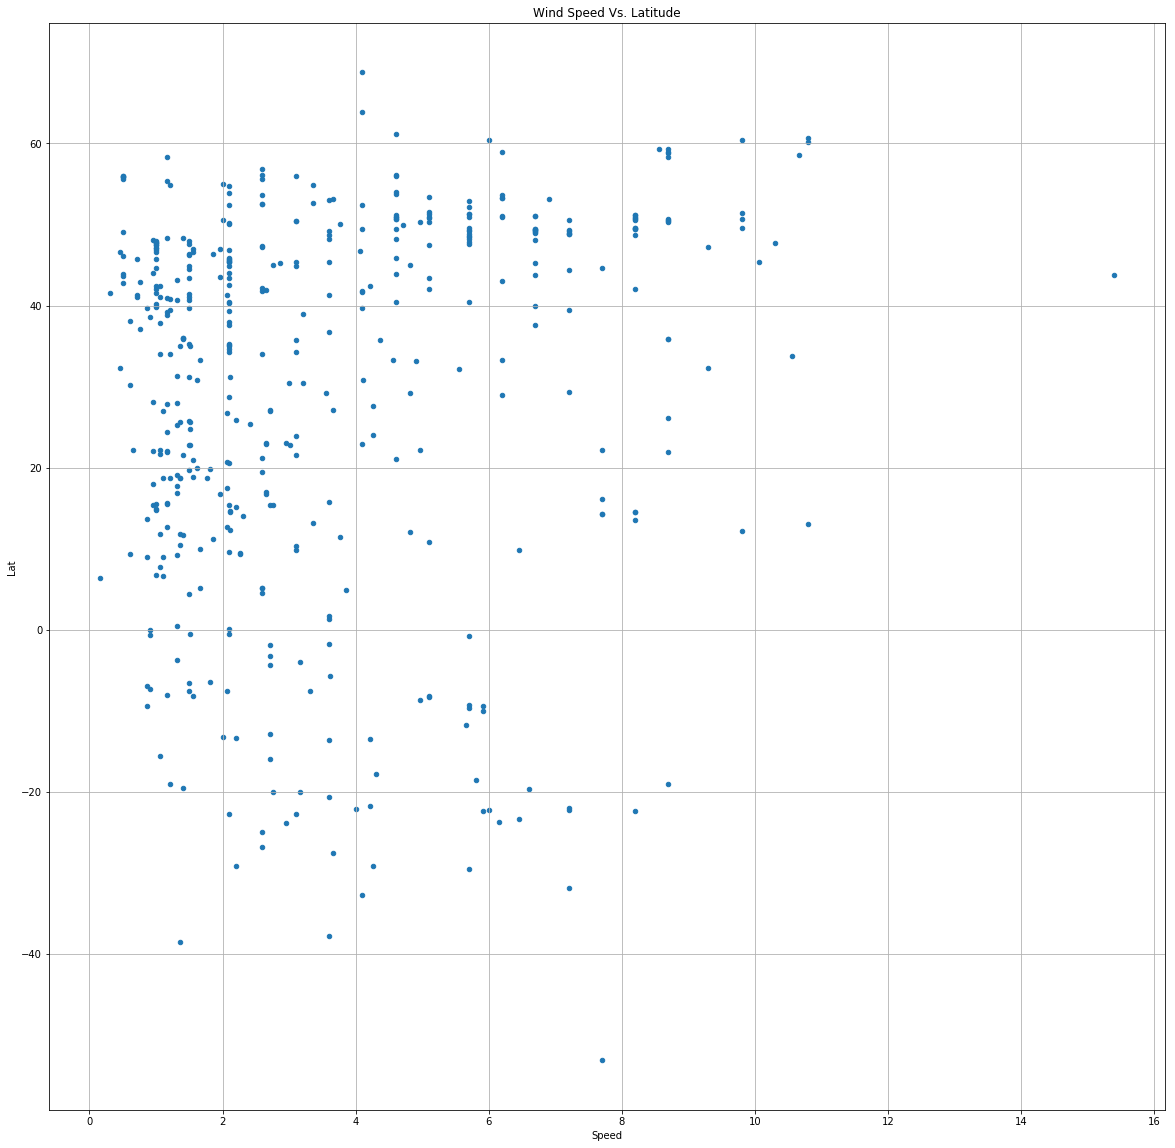

In [117]:
#4 scatter plot Wind Speed (mph) vs. Latitude

summary_df.plot(kind="scatter", x="Speed", y="Lat", grid=True, figsize=(20,20), 
                title="Wind Speed Vs. Latitude")

plt.show() 